# NeurotechX Montreal MNI/Deeplearning Workshop

## Utilities

In [51]:
%matplotlib inline
from shutil import unpack_archive
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from sys import argv, exit
from os.path import  exists
from os import makedirs
import argparse
#local modules defined in current project
from make_and_run_model import *
from predict import *
from prepare_data import *
from utils import *
from custom_loss import *
from plot_metrics import *
from minc_keras import *


In [0]:
# Clone repo
!git clone --recursive https://www.github.com/tfunck/minc_keras

rm: cannot remove 'minc_keras': No such file or directory
Cloning into 'minc_keras'...
remote: Counting objects: 373, done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 373 (delta 53), reused 51 (delta 20), pack-reused 273
Receiving objects: 100% (373/373), 61.96 MiB | 17.83 MiB/s, done.
Resolving deltas: 100% (183/183), done.


In [32]:
# Set data directory for extract
current_dir = os.getcwd()
data_dir = os.path.join(current_dir, 'data')

# Extract data
unpack_archive('data\\output.tar.bz2', data_dir)

In [52]:
source_dir = os.path.join(current_dir, 'data/output/')
target_dir = ''
nb_epoch = 2
model_type = "model_0_0"
input_str = "*T1w_anat*"
label_str = "*seg*"
images_to_predict = '1,4'
ratios =  [0.3,0.3]
clobber = True
batch_size = 1
feature_dim = 2
model_fn = 'model.hdf5'
images_fn = 'images.csv'
verbose = 1

In [53]:
# Call main function
minc_keras(source_dir, target_dir, input_str, label_str, ratios, feature_dim=2, 
           batch_size=2, nb_epoch=nb_epoch, images_to_predict=images_to_predict, 
           clobber=clobber, model_fn=model_fn,model_type=model_type, images_fn=images_fn, verbose=verbose)

268 0.3
train : expected/real ratio = 30.00 / 29.85
268 0.3
validate : expected/real ratio = 30.00 / 29.85


C:\Users\frede\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Saving train images: 70 / 80
Saving validate images: 70 / 80
Saving validate images: 70 / 80
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 110, 92, 1)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 110, 92, 16)       160       
_________________________________________________________________
dropout_19 (Dropout)         (None, 110, 92, 16)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 110, 92, 16)       2320      
_________________________________________________________________
dropout_20 (Dropout)         (None, 110, 92, 16)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 110, 92, 32)       4640      
_________________________________________________

0

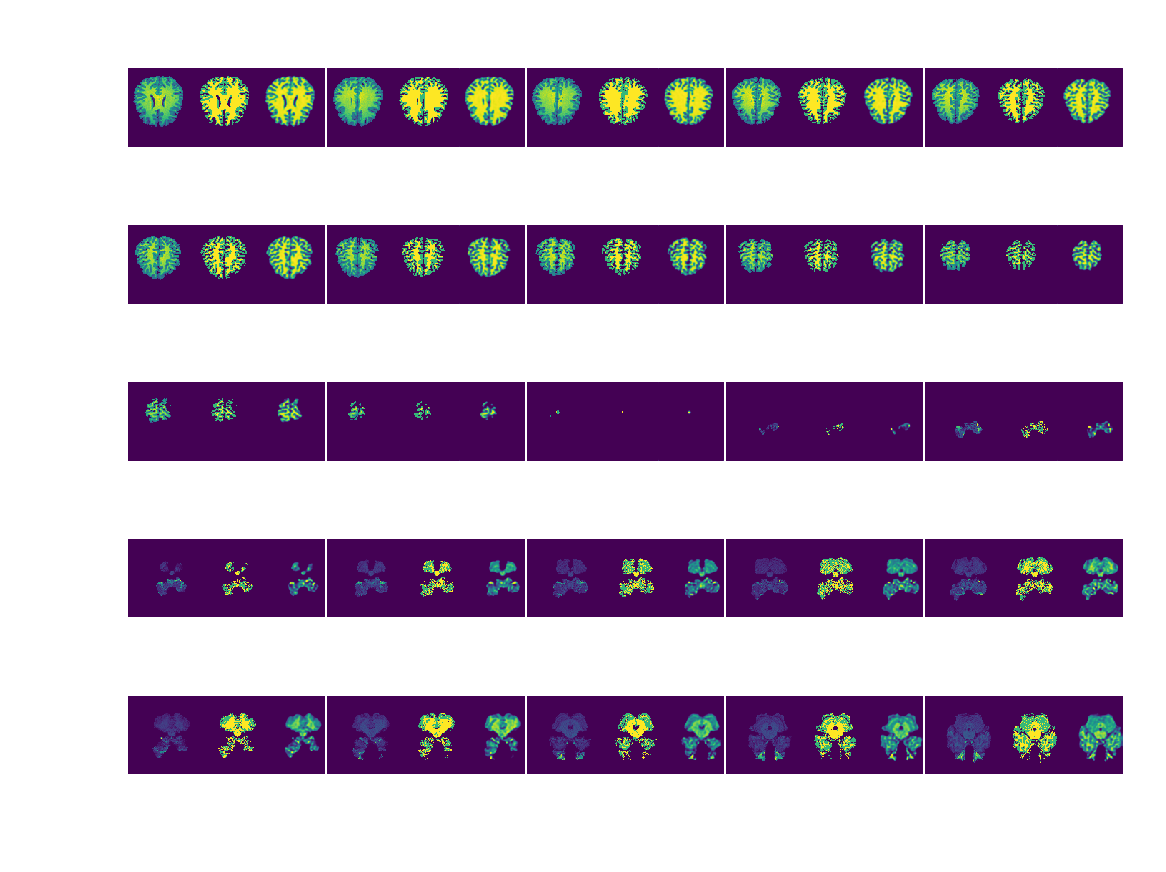

In [54]:
# Show MRI segmentation results
for fn in glob('predict/*/*.png'):
    img = mpimg.imread(fn)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis('off')
plt.show()

In [55]:
# Show training plots
plt.figure(figsize=(20,20))
plt.imshow(plt.imread('report/model_training_plot.png'))
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'report/model_training_plot.png'

In [ ]:
# Prepare directories
data_dir = target_dir + os.sep + 'data'+os.sep
report_dir = target_dir+os.sep+'report'+os.sep
train_dir = target_dir+os.sep+'predict'+os.sep+'train'+os.sep
test_dir = target_dir+os.sep+'predict'+os.sep+'test'+os.sep
validate_dir = target_dir+os.sep+'predict'+os.sep+'validate'+os.sep
model_dir=target_dir+os.sep+'model'
if not exists(train_dir): makedirs(train_dir)
if not exists(test_dir): makedirs(test_dir)
if not exists(validate_dir): makedirs(validate_dir)
if not exists(data_dir): makedirs(data_dir)
if not exists(report_dir): makedirs(report_dir) 
if not exists(model_dir): makedirs(model_dir) 

In [ ]:
    parser = argparse.ArgumentParser(description='Process some integers.')
    parser.add_argument('--batch-size', dest='batch_size', type=int, default=1, help='size of batch')
    parser.add_argument('--source', dest='source_dir', type=str, help='source directory')
    parser.add_argument('--target', dest='target_dir', type=str, help='target directory')
    parser.add_argument('--epochs', dest='nb_epoch', type=int,default=10, help='number of training epochs')
    #parser.add_argument('--feature-dim', dest='feature_dim', type=int,default=2, help='Warning: option temporaily deactivated. Do not use. Format of features to use (3=Volume, 2=Slice, 1=profile')
    parser.add_argument('--model', dest='model_fn', default='model.hdf5',  help='model file where network weights will be saved/loaded. will be automatically generated if not provided by user')
    parser.add_argument('--model-type', dest='model_type', default='model_0_0',  help='Name of network architecture to use (Default=model_0_0): unet, model_0_0 (simple convolution-only network), dil (same as model_0_0 but with dilations).')
    parser.add_argument('--ratios', dest='ratios', nargs=2, type=float , default=[0.7,0.15,0.15],  help='List of ratios for training, validating, and testing (default = 0.7 0.15 0.15)')
    parser.add_argument('--predict', dest='images_to_predict', type=str, default=None, help='either 1) \'all\' to predict all images OR a comma separated list of index numbers of images on which to perform prediction (by default perform none). example \'1,4,10\' ')
    parser.add_argument('--input-str', dest='input_str', type=str, default='pet', help='String for input (X) images')
    parser.add_argument('--label-str', dest='label_str', type=str, default='brainmask', help='String for label (Y) images')
    parser.add_argument('--clobber', dest='clobber',  action='store_true', default=False,  help='clobber')
    parser.add_argument('-v', '--verbose', dest='verbose', type=int,default=1, help='Level of verbosity (0=silent, 1=basic (default), 2=detailed, 3=debug')
    args = parser.parse_args()
    args.feature_dim =2

In [13]:
# 
!python minc_keras.py --source data/output/ --target . --epochs 5 --model-type "model_0_0" --input-str "*T1w_anat*" --label-str "*seg*" --predict 1 --ratios 0.3 0.3 --clobber

268 0.3
train : expected/real ratio = 30.00 / 29.85
268 0.3
validate : expected/real ratio = 30.00 / 29.85
Saving train images: 0 / 80
Saving train images: 10 / 80
Saving train images: 20 / 80
Saving train images: 30 / 80
Saving train images: 40 / 80
Saving train images: 50 / 80
Saving train images: 60 / 80
Saving train images: 70 / 80

Saving validate images: 0 / 80
Saving validate images: 10 / 80
Saving validate images: 20 / 80
Saving validate images: 30 / 80
Saving validate images: 40 / 80
Saving validate images: 50 / 80
Saving validate images: 60 / 80
Saving validate images: 70 / 80

Saving validate images: 0 / 80
Saving validate images: 10 / 80
Saving validate images: 20 / 80
Saving validate images: 30 / 80
Saving validate images: 40 / 80
Saving validate images: 50 / 80
Saving validate images: 60 / 80
Saving validate images: 70 / 80

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLay

2018-03-17 18:59:32.917887: I C:\tf_jenkins\workspace\rel-win\M\windows-gpu\PY\36\tensorflow\core\platform\cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX AVX2
2018-03-17 18:59:34.019726: I C:\tf_jenkins\workspace\rel-win\M\windows-gpu\PY\36\tensorflow\core\common_runtime\gpu\gpu_device.cc:1105] Found device 0 with properties: 
name: GeForce GTX 960M major: 5 minor: 0 memoryClockRate(GHz): 1.176
pciBusID: 0000:02:00.0
totalMemory: 4.00GiB freeMemory: 3.35GiB
2018-03-17 18:59:34.020477: I C:\tf_jenkins\workspace\rel-win\M\windows-gpu\PY\36\tensorflow\core\common_runtime\gpu\gpu_device.cc:1195] Creating TensorFlow device (/device:GPU:0) -> (device: 0, name: GeForce GTX 960M, pci bus id: 0000:02:00.0, compute capability: 5.0)
C:\Users\frede\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated

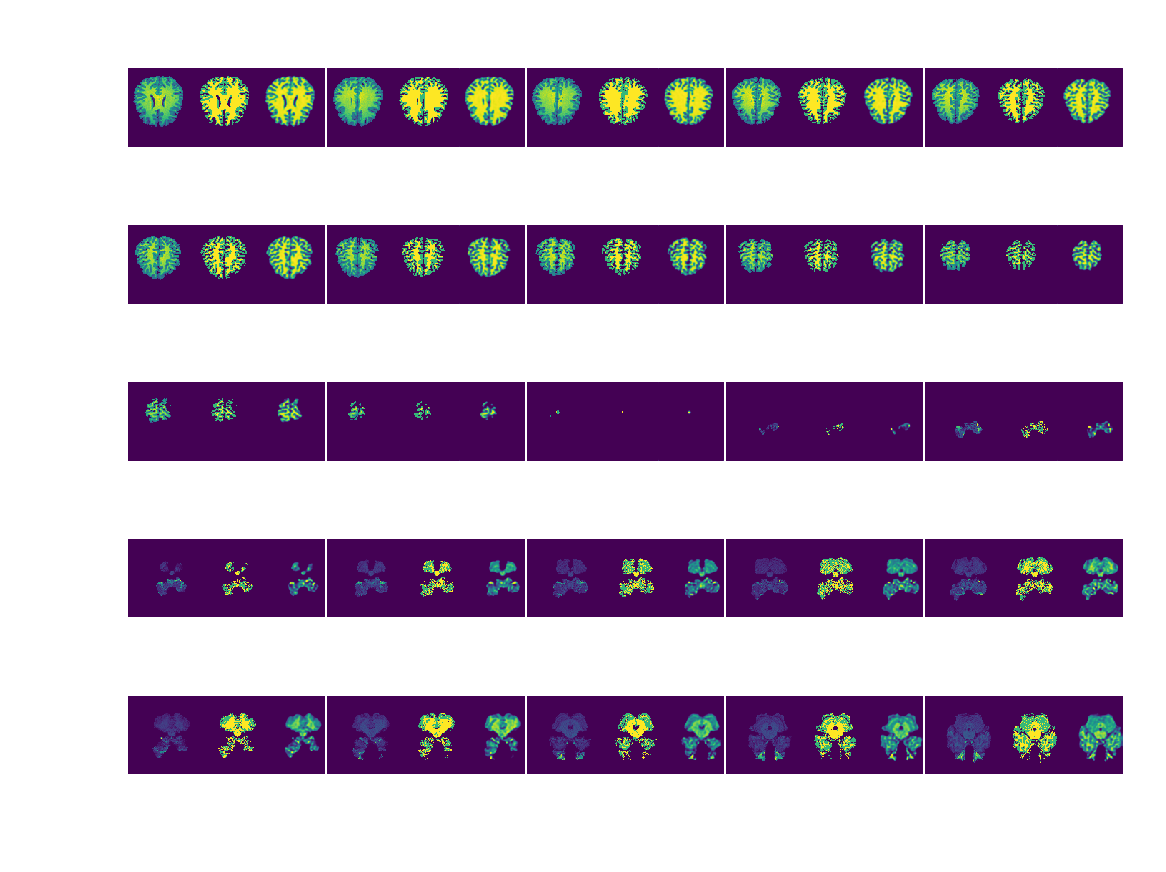

In [46]:
# Show MRI segmentation results
for fn in glob('predict/*/*.png'):
    img = mpimg.imread(fn)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis('off')
plt.show()

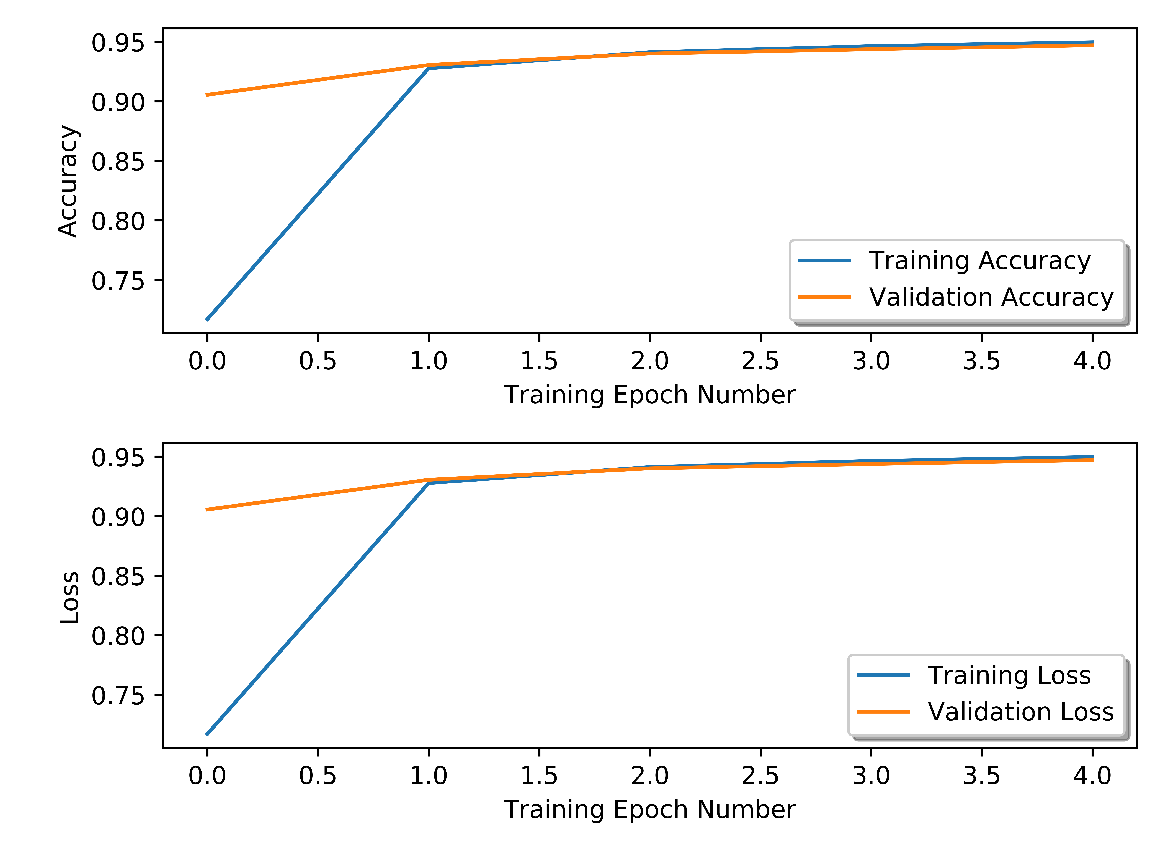

In [45]:
# Show training plots
plt.figure(figsize=(20,20))
plt.imshow(plt.imread('report/model_training_plot.png'))
plt.axis('off')
plt.show()

In [0]:
!python3 minc_keras/minc_keras.py --source output/ --target . --epochs 5 --model-type "model_0_0" --input-str "*T1w_anat*" --label-str "*seg*" --predict 1 --ratios 0.3 0.3 --clobber


/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
268 0.3
train : expected/real ratio = 30.00 / 29.85
268 0.3
validate : expected/real ratio = 30.00 / 29.85
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 110, 92, 1)        0         
___________________________________

In [0]:
from google.colab import files
from glob import glob
for fn in glob('predict/*/*.png') : files.download(fn)


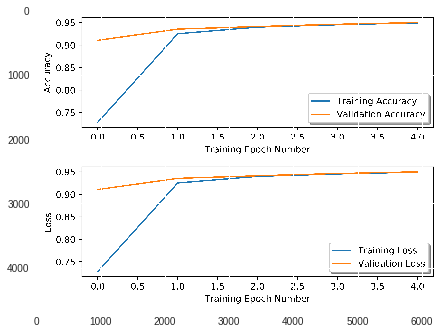

In [0]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('report/model_training_plot.png'))